In [50]:
import numpy as np
import pandas as pd

In [51]:
# 1. Load Data
data = pd.read_csv('/content/drive/MyDrive/loan predictor/loan_data.csv')

In [52]:
#Check Column Names
print(f"Columns: {data.columns.tolist()}")

Columns: ['loan_id', ' no_of_dependents', ' education', ' self_employed', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value', ' loan_status']


Found spaces at beginning of column names

In [53]:
# Remove spaces in coulmn names
data.columns = data.columns.str.strip()
print(f"Columns: {data.columns.tolist()}")

Columns: ['loan_id', 'no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'loan_status']


In [54]:
data = data.drop(columns=['loan_id'])
data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [55]:
# found spaces in output of loan_status column and Mapping the output of target variable
data['loan_status'] = data['loan_status'].str.strip()
data['loan_status'] = data['loan_status'].map({'Approved': 1, 'Rejected': 0})
data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


In [56]:
numeric_cols = data.select_dtypes(include=['number']).columns
print("Minimum values per column:")
print(data[numeric_cols].min())

Minimum values per column:
no_of_dependents                 0
income_annum                200000
loan_amount                 300000
loan_term                        2
cibil_score                    300
residential_assets_value   -100000
commercial_assets_value          0
luxury_assets_value         300000
bank_asset_value                 0
loan_status                      0
dtype: int64


In [57]:
data.loc[data['residential_assets_value'] < 0, 'residential_assets_value'] = 0

In [58]:
print(f"Duplicates: {data.duplicated().sum()}")

Duplicates: 0


In [59]:
X = data.drop('loan_status', axis=1)
y = data['loan_status']

Splitting data into train and test sets

In [60]:
from sklearn.model_selection import train_test_split

# Stratify=y is crucial here because of the class imbalance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Train Shape: {X_train.shape}, Test Shape: {X_test.shape}")

Train Shape: (3415, 11), Test Shape: (854, 11)


In [61]:
print("Target Class Distribution :")
y_train.value_counts(normalize=True)

Target Class Distribution :


,proportion
loan_status,
1,0.622255
0,0.377745


Found Class Imbalance between approved and rejected

In [62]:
X_train.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,3415.000000,3.415000e+03,3.415000e+03,3415.000000,3415.000000,3.415000e+03,3.415000e+03,3.415000e+03,3.415000e+03
mean,2.489312,5.058712e+06,1.509148e+07,10.874963,599.411420,7.409985e+06,4.967174e+06,1.513982e+07,4.983631e+06
std,1.696283,2.792881e+06,8.926746e+06,5.730973,172.943903,6.418935e+06,4.368133e+06,9.091030e+06,3.235470e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,0.000000e+00,0.000000e+00,3.000000e+05,0.000000e+00
25%,1.000000,2.700000e+06,7.800000e+06,6.000000,450.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.400000e+06
50%,3.000000,5.100000e+06,1.460000e+07,10.000000,598.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.500000e+06
75%,4.000000,7.400000e+06,2.130000e+07,16.000000,749.000000,1.120000e+07,7.600000e+06,2.160000e+07,7.000000e+06
max,5.000000,9.900000e+06,3.880000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [63]:
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()
num_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()

In [64]:
print(f"Categorical: {cat_cols}")
print(f"Numerical: {num_cols}")

Categorical: ['education', 'self_employed']
Numerical: ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']


Missing Values in Numerical Columns:
no_of_dependents            0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
dtype: int64
Missing Values in Categorical Columns:
education        0
self_employed    0
dtype: int64


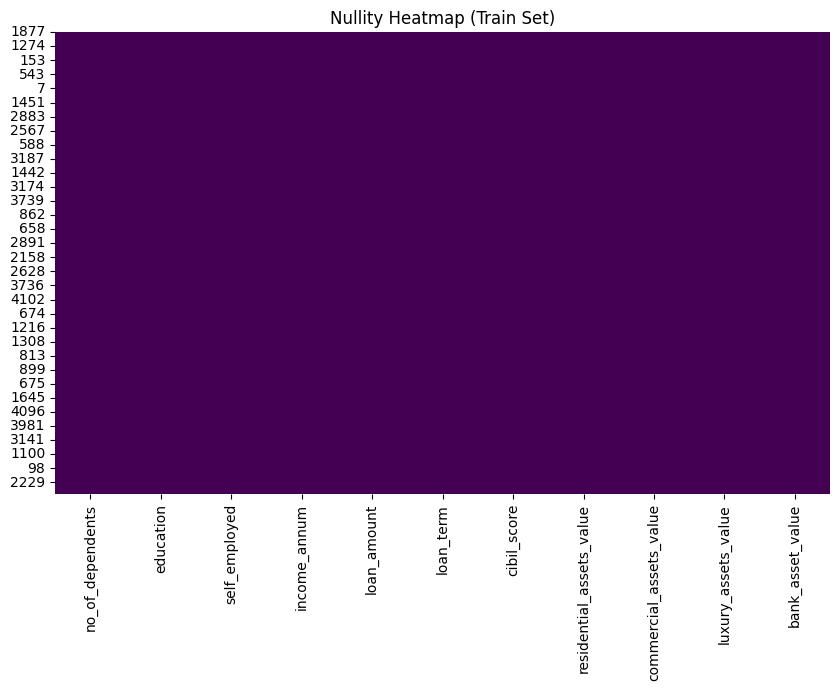

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Missing Values in Numerical Columns:")
print(X_train[num_cols].isnull().sum())

print("Missing Values in Categorical Columns:")
print(X_train[cat_cols].isnull().sum())

# Nullity heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(X_train.isnull(),cbar=False, cmap='viridis')
plt.title("Nullity Heatmap (Train Set)")
plt.show()


**Visualizations**

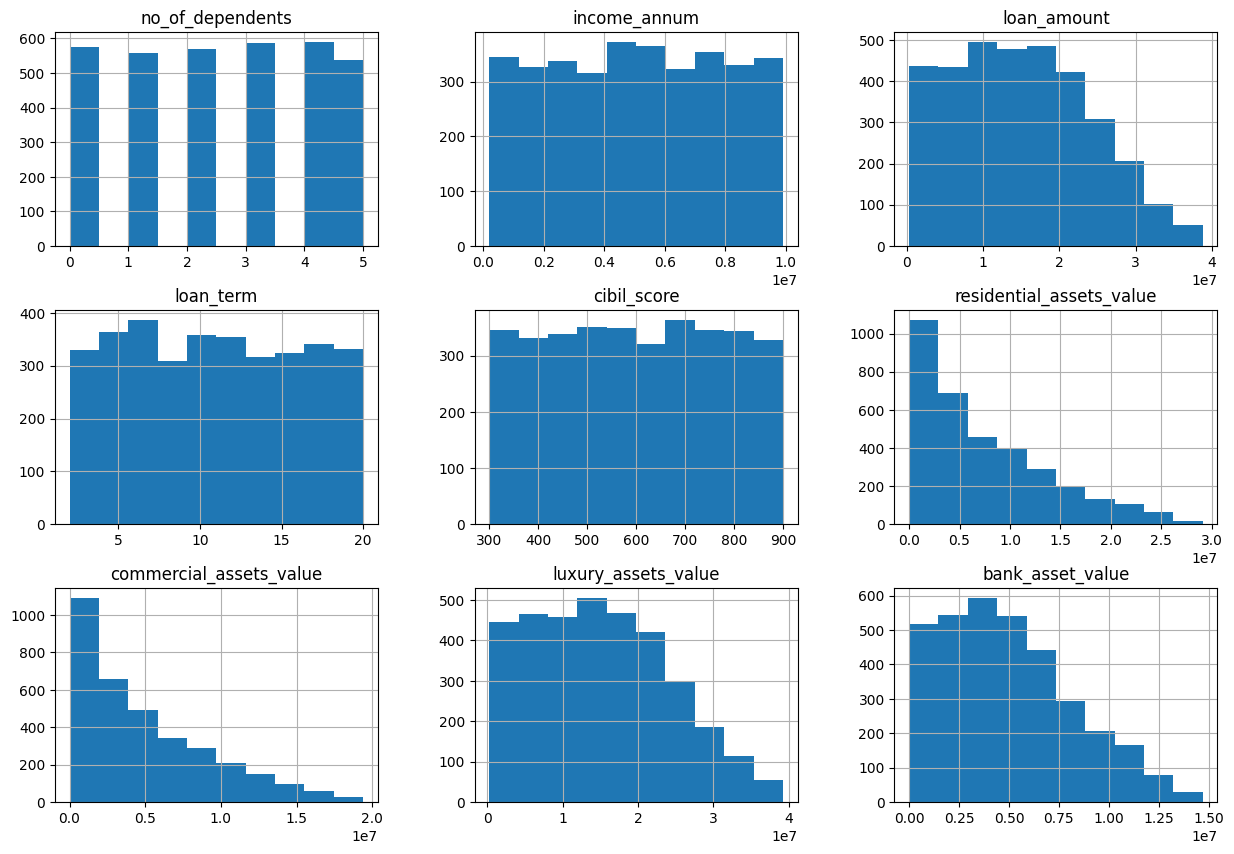

In [66]:
# Histograms
X_train.hist(figsize=(15, 10))
plt.show()

Outlier check using box plots

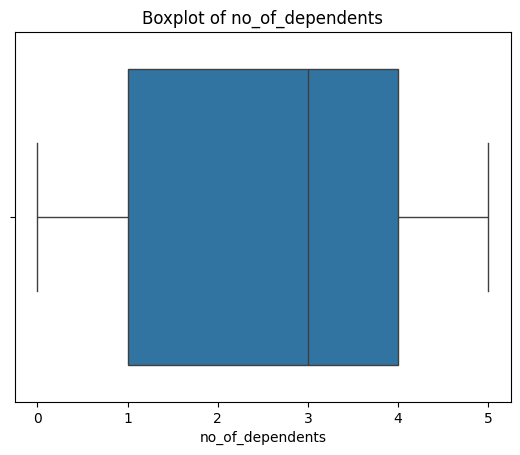

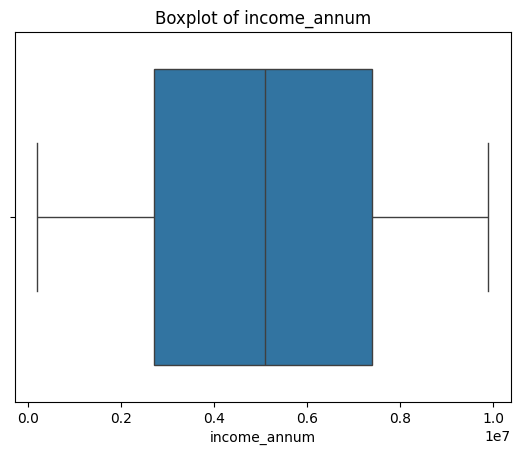

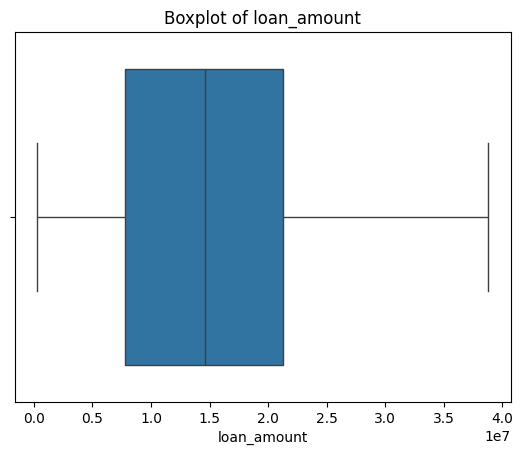

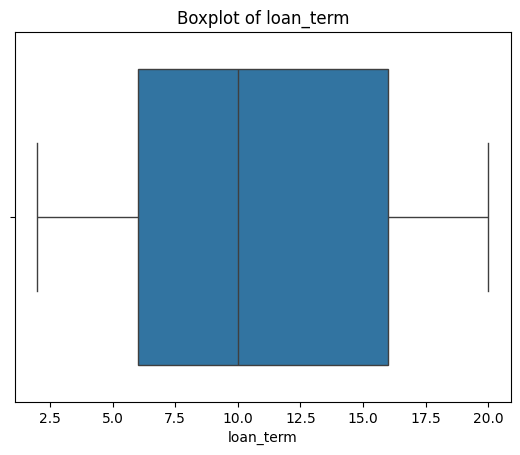

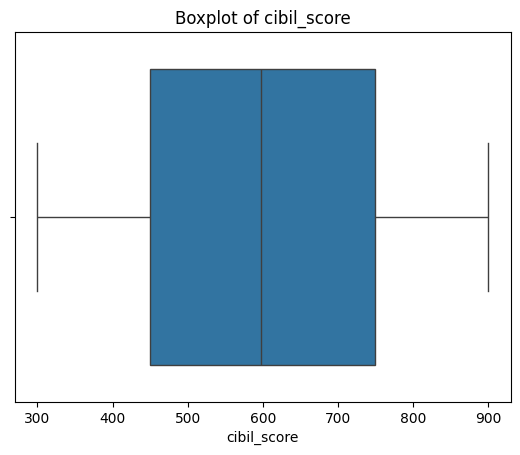

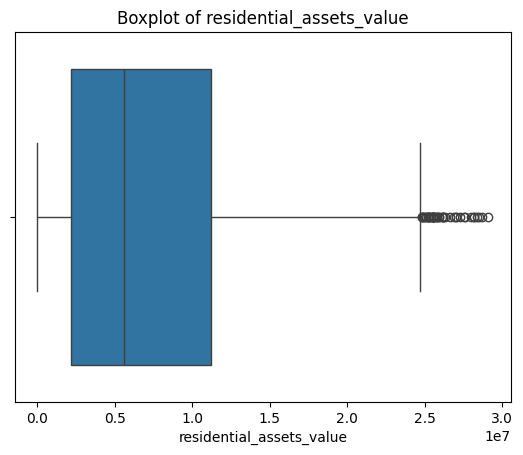

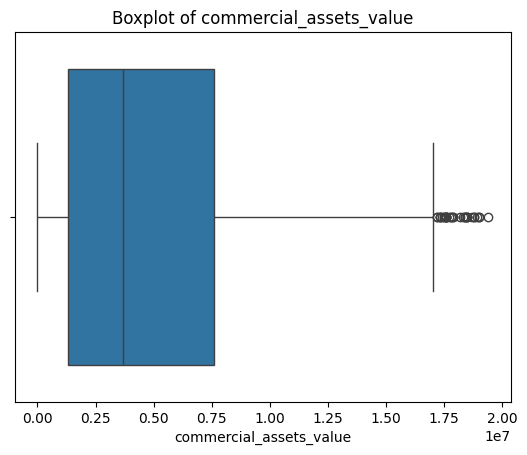

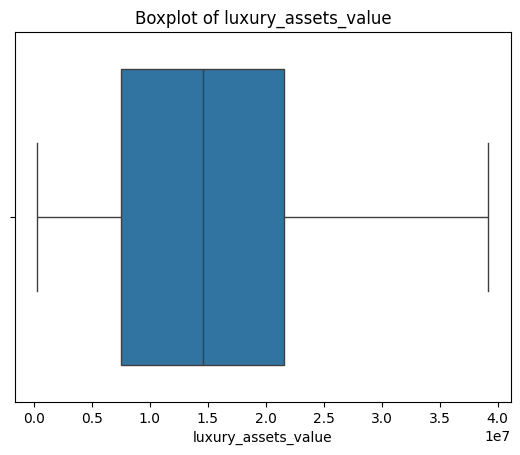

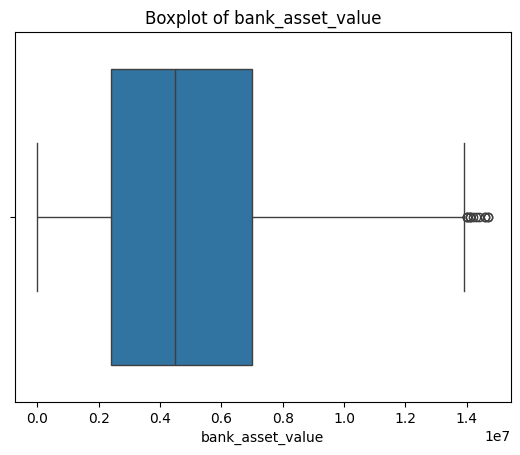

In [67]:
# Boxplots (Outliers)
for col in num_cols:
    plt.figure()
    sns.boxplot(x=X_train[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

I found outliers in these 3 columns bank_asset_value, residential_assets_value, and commercial_assets_value which are real outliers.


people with high income will have more valuable assets. they are rich maybe millionaire or billionaire.

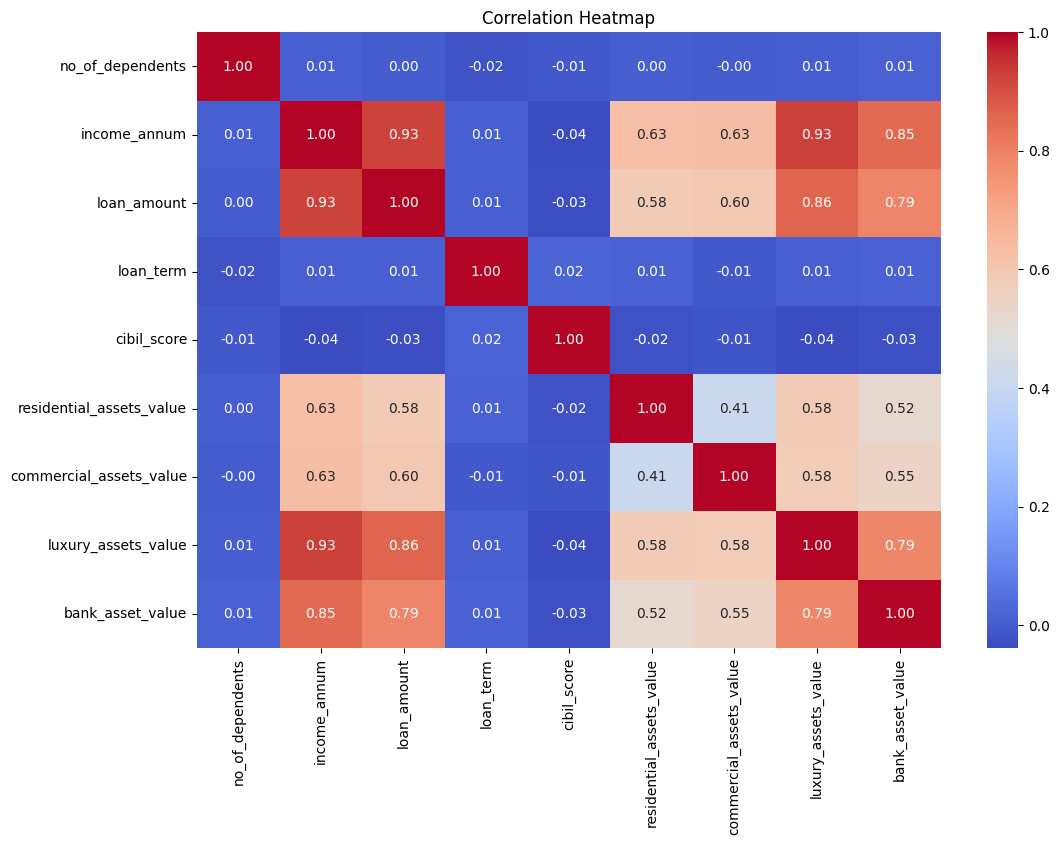

In [68]:
#Correlation Heatmap codedat
plt.figure(figsize=(12, 8))
corr_matrix = X_train[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Found strong correlation bet

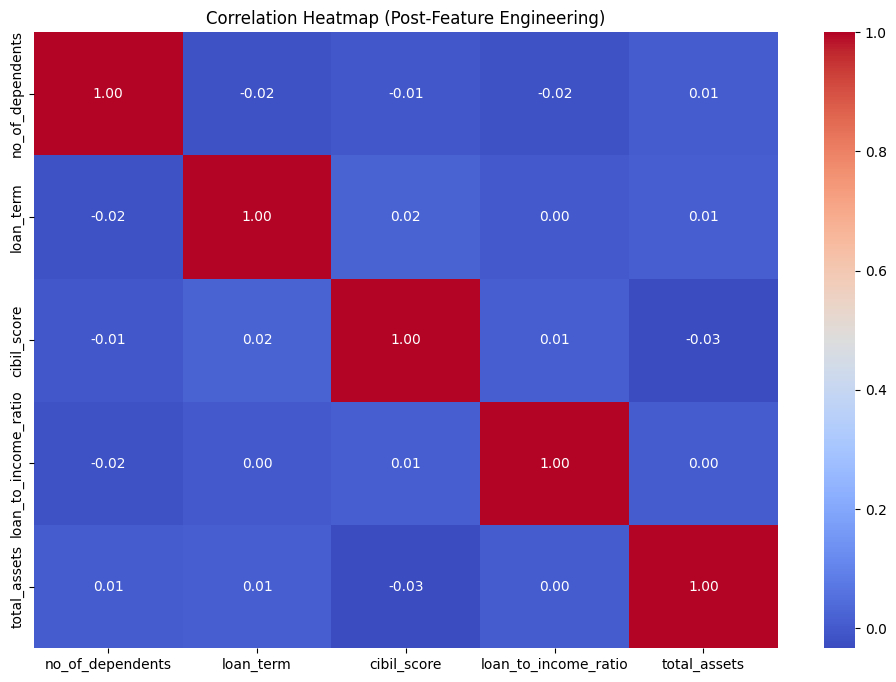

In [69]:
def create_features(df):
    df = df.copy()
    #Loan to Income ratio
    df['loan_to_income_ratio'] = df['loan_amount'] / df['income_annum']

    #Aggregate Assets
    df['total_assets'] = (df['residential_assets_value'] +
                          df['commercial_assets_value'] +
                          df['luxury_assets_value'] +
                          df['bank_asset_value'])

    # 3. Drop Redundant Columns
    df = df.drop(columns=['loan_amount', 'income_annum',
                          'residential_assets_value', 'commercial_assets_value',
                          'luxury_assets_value', 'bank_asset_value'])
    return df

# Apply to Train AND Test
X_train = create_features(X_train)
X_test = create_features(X_test)

#Updating columns after feature engineering
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()
num_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()

# check Correlation on the NEW features
plt.figure(figsize=(12, 8))
corr_matrix = X_train[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Post-Feature Engineering)')
plt.show()

I performed feature engineering to address the multicollinearity I found in the heatmap.


1. Interaction Feature: I created a loan_to_income ratio. This captures the applicant's repayment burden, which is a much stronger predictor of risk than raw income alone.


2. Dimensionality Reduction: Since the asset classes were highly correlated, I aggregated them into total_assets.

In [70]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ])

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,accuracy_score

models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(random_state=42, class_weight='balanced'),
    "XGBoost": XGBClassifier(eval_metric='logloss', scale_pos_weight=10)
    # Note: XGBoost uses 'scale_pos_weight' instead of 'class_weight' for imbalance
}

In [72]:
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # Fit the pipeline
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print(f"--- {name} Report ---")
    print(classification_report(y_test, y_pred))
    print("\n")

--- Decision Tree Report ---
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       323
           1       0.99      0.99      0.99       531

    accuracy                           0.99       854
   macro avg       0.99      0.99      0.99       854
weighted avg       0.99      0.99      0.99       854



--- Random Forest Report ---
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       323
           1       0.99      1.00      1.00       531

    accuracy                           1.00       854
   macro avg       1.00      0.99      1.00       854
weighted avg       1.00      1.00      1.00       854



--- XGBoost Report ---
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       323
           1       0.99      1.00      0.99       531

    accuracy                           0.99       854
   macro avg       0.99      0.99      0.99

In [73]:
# overfitting Check
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    pipeline.fit(X_train, y_train)

    # Train score
    y_train_pred = pipeline.predict(X_train)
    train_score = accuracy_score(y_train, y_train_pred)

    # Test score
    y_test_pred = pipeline.predict(X_test)
    test_score = accuracy_score(y_test, y_test_pred)

    print(f"\n--- {name} ---")
    print(f"Train Accuracy: {train_score:.4f}")
    print(f"Test Accuracy: {test_score:.4f}")
    print(f"Difference: {abs(train_score - test_score):.4f}")
    print(classification_report(y_test, y_test_pred))


--- Decision Tree ---
Train Accuracy: 1.0000
Test Accuracy: 0.9918
Difference: 0.0082
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       323
           1       0.99      0.99      0.99       531

    accuracy                           0.99       854
   macro avg       0.99      0.99      0.99       854
weighted avg       0.99      0.99      0.99       854


--- Random Forest ---
Train Accuracy: 1.0000
Test Accuracy: 0.9953
Difference: 0.0047
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       323
           1       0.99      1.00      1.00       531

    accuracy                           1.00       854
   macro avg       1.00      0.99      1.00       854
weighted avg       1.00      1.00      1.00       854


--- XGBoost ---
Train Accuracy: 1.0000
Test Accuracy: 0.9930
Difference: 0.0070
              precision    recall  f1-score   support

           0       1.00      0.98   

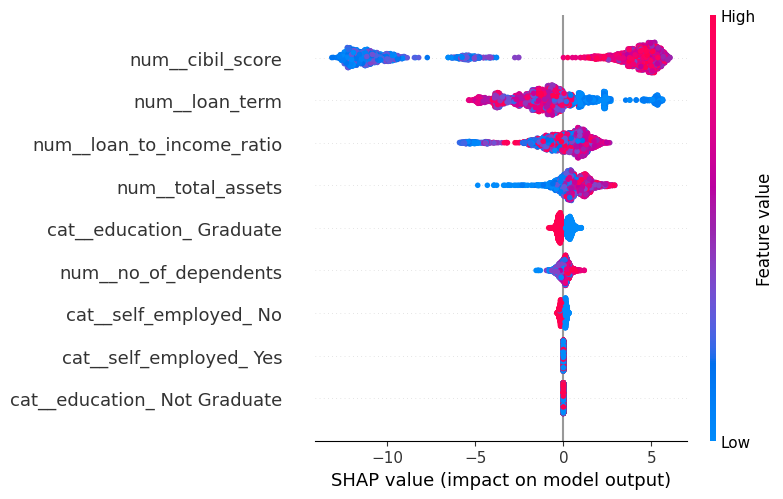

In [74]:
#XGBoost pipeline
model = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', models['XGBoost'])])
model.fit(X_train, y_train)

import shap

# 1. Setup Explainer
explainer = shap.TreeExplainer(model.named_steps['classifier'])

# 2. Transform Data
X_train_transformed = model.named_steps['preprocessor'].transform(X_train)
if hasattr(X_train_transformed, 'toarray'):
    X_train_transformed = X_train_transformed.toarray()

# 3. Calculate SHAP values
shap_values = explainer.shap_values(X_train_transformed)

# 4. Summary Plot
shap.summary_plot(shap_values, X_train_transformed, feature_names=model.named_steps['preprocessor'].get_feature_names_out())

# 5. Force Plot
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train_transformed[0,:], feature_names=model.named_steps['preprocessor'].get_feature_names_out())

In [75]:
# model saving
import joblib

model_path = '/content/drive/MyDrive/loan predictor/loan_model.joblib'
joblib.dump(model, model_path)

['/content/drive/MyDrive/loan predictor/loan_model.joblib']

In [ ]:
from huggingface_hub import HfApi, login

HF_TOKEN = "hTOKEN"
login(HF_TOKEN)

repo_name = "Ravichandrachilde/loan-prediction-XGB"

api = HfApi()
api.upload_file(
    path_or_fileobj="/content/drive/MyDrive/loan predictor/loan_model.joblib",
    path_in_repo="loan_model.joblib",
    repo_id=repo_name,
    token=HF_TOKEN,
    repo_type="model"
)

Processing Files (0 / 0)      : |          |  0.00B /  0.00B            

New Data Upload               : |          |  0.00B /  0.00B            

  ...edictor/loan_model.joblib: 100%|##########|  132kB /  132kB            

No files have been modified since last commit. Skipping to prevent empty commit.


CommitInfo(commit_url='https://huggingface.co/Ravichandrachilde/loan-prediction-XGB/commit/3d0fa53409aa458039b5a17d53935680a9c476ae', commit_message='Upload loan_model.joblib with huggingface_hub', commit_description='', oid='3d0fa53409aa458039b5a17d53935680a9c476ae', pr_url=None, repo_url=RepoUrl('https://huggingface.co/Ravichandrachilde/loan-prediction-XGB', endpoint='https://huggingface.co', repo_type='model', repo_id='Ravichandrachilde/loan-prediction-XGB'), pr_revision=None, pr_num=None)